In [ ]:
import pandas as pd
import plotly.express as px



In [ ]:
path = "../data"


json_path = "../data/_annotations.coco.json"


'/home/marwa/Detection_Img/prepare_data'

In [31]:
from pathlib import Path

if not Path(path).exists():
    print(f"Le dossier n'existe pas : {path}")
else:
    print(f"Dossier trouvé : {path}")
    print("Contenu :", list(Path(path).iterdir()))


Dossier trouvé : ../data
Contenu : [PosixPath('../data/cl6odm3oj0023ao55641s046f_4_FALSE_COLOR__URBAN_jpg.rf.e06b1ddebe1889e272bf11bcd8220072.jpg'), PosixPath('../data/cl6azt6by0000go55h4io4tab_6_SWIR_jpg.rf.f8a793559d8103b9c237ca96944514b5.jpg'), PosixPath('../data/cl6e2xkh0002mgk55aif2aqvo_2_FALSE_COLOR_jpg.rf.0b7ee80fe8e0318db34d8f46d4d9e818.jpg'), PosixPath('../data/cl6opc9oz006zao552eyx63jq_6_SWIR_jpg.rf.76de8b1ec7f1aeb69a59748d8a8c9207.jpg'), PosixPath('../data/cl6lt6ipg00288w55ee7scu7b_6_SWIR_jpg.rf.217d62e8998857f4cc5ca3a6ad7e5412.jpg'), PosixPath('../data/cl6b5x63r005il4551chxdt93_2_FALSE_COLOR_jpg.rf.8c4fb06b6812031edb1ad781ec14d2b9.jpg'), PosixPath('../data/cl6kgnh9k0030c455dtnabosj_4_FALSE_COLOR__URBAN_jpg.rf.9bf22dbcfc66e6fb99e981e0bf995458.jpg'), PosixPath('../data/cl6chqhwl00cll4558hnj0glz_6_SWIR_jpg.rf.1056e04894280f6c5f84af1ce3f49ad9.jpg'), PosixPath('../data/cl6cse9tv00fbl4552j5aepjj_2_FALSE_COLOR_jpg.rf.858fc862940a80171ba1698d549acec2.jpg'), PosixPath('../data/cl6b5

Nombre d'images trouvées : 500
[PosixPath('../data/cl6odm3oj0023ao55641s046f_4_FALSE_COLOR__URBAN_jpg.rf.e06b1ddebe1889e272bf11bcd8220072.jpg'), PosixPath('../data/cl6azt6by0000go55h4io4tab_6_SWIR_jpg.rf.f8a793559d8103b9c237ca96944514b5.jpg'), PosixPath('../data/cl6e2xkh0002mgk55aif2aqvo_2_FALSE_COLOR_jpg.rf.0b7ee80fe8e0318db34d8f46d4d9e818.jpg'), PosixPath('../data/cl6opc9oz006zao552eyx63jq_6_SWIR_jpg.rf.76de8b1ec7f1aeb69a59748d8a8c9207.jpg'), PosixPath('../data/cl6lt6ipg00288w55ee7scu7b_6_SWIR_jpg.rf.217d62e8998857f4cc5ca3a6ad7e5412.jpg')]


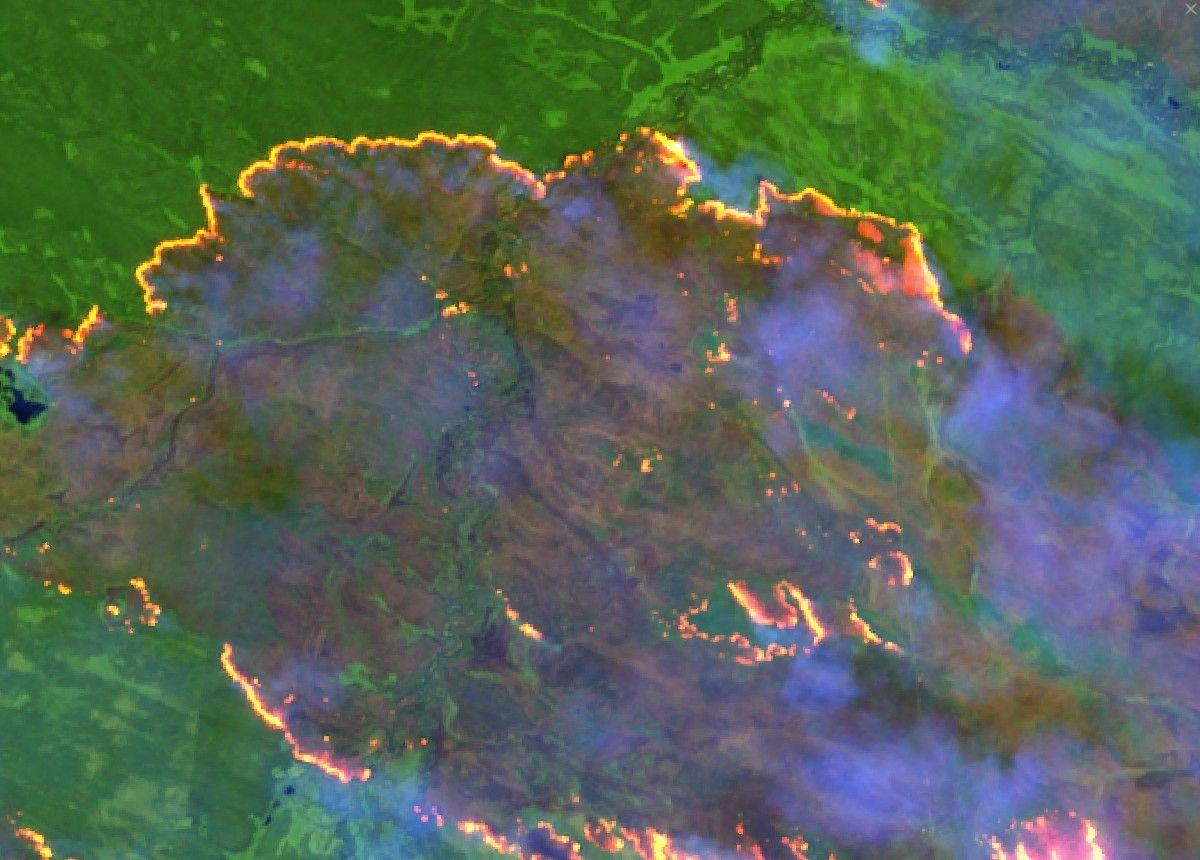

In [24]:
from pathlib import Path
from PIL import Image


data_folder = Path("../data")

image_paths = list(data_folder.glob("*.jpg"))
print(f"Nombre d'images trouvées : {len(image_paths)}")
print(image_paths[:5]) 

if image_paths:
    img = Image.open(image_paths[0])
    img.show()
    


In [ ]:
import os
from PIL import Image


image_folder = "../data"


extensions = (".jpg", ".jpeg", ".png")


fichiers_corrompus = []
infos_images = []

for filename in os.listdir(image_folder):
    if filename.lower().endswith(extensions):
        filepath = os.path.join(image_folder, filename)
        try:
            with Image.open(filepath) as img:
                img.verify()  # Vérifie que l'image n'est pas corrompue
                infos_images.append({
                    "nom": filename,
                    "format": img.format,
                    "taille": img.size,
                    "mode": img.mode
                })
        except Exception as e:
            fichiers_corrompus.append((filename, str(e)))

# Résultats
print(f"Nombre total d'images valides : {len(infos_images)}")
print(f"Nombre d'images corrompues : {len(fichiers_corrompus)}")

if fichiers_corrompus:
    print("Liste des fichiers corrompus ou problématiques :")
    for f, erreur in fichiers_corrompus:
        print(f"- {f} : {erreur}")

# Optionnel : afficher les premières images valides
if infos_images:
    print("\nExemple d'informations sur la première image valide :")
    print(infos_images[0])


Nombre total d'images valides : 500
Nombre d'images corrompues : 0

Exemple d'informations sur la première image valide :
{'nom': 'cl6odm3oj0023ao55641s046f_4_FALSE_COLOR__URBAN_jpg.rf.e06b1ddebe1889e272bf11bcd8220072.jpg', 'format': 'JPEG', 'taille': (1200, 860), 'mode': 'RGB'}


In [35]:
from pathlib import Path
import pandas as pd
import json
from collections import Counter


def get_file_extensions(folder_path: str) -> Counter:
    """
    Récupère les extensions des fichiers présents dans un dossier.

    Args:
        folder_path (str): Chemin du dossier à analyser.

    Returns:
        Counter: Un compteur des extensions de fichiers trouvées (en minuscules).
                 Exemple : Counter({'.jpg': 10, '.png': 5})
    """
    folder = Path(folder_path)
    extensions = [file.suffix.lower() for file in folder.iterdir() if file.is_file()]
    return Counter(extensions)


def load_coco_json(json_path: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Charge un fichier JSON au format COCO et renvoie les DataFrames des images et annotations.

    Args:
        json_path (str): Chemin du fichier JSON à charger.

    Raises:
        FileNotFoundError: Si le fichier n'existe pas.

    Returns:
        tuple[pd.DataFrame, pd.DataFrame]: 
            - DataFrame contenant les métadonnées des images.
            - DataFrame contenant les annotations associées.
    """
    if not Path(json_path).is_file():
        raise FileNotFoundError(f"Le fichier JSON n'existe pas : {json_path}")
    with open(json_path, "r", encoding="utf-8") as f:
        coco_dict = json.load(f)

    images_df = pd.DataFrame(coco_dict["images"])
    annotations_df = pd.DataFrame(coco_dict["annotations"])
    return images_df, annotations_df


def check_image(images_folder: str, images_df: pd.DataFrame) -> tuple[set, set]:
    """
    Vérifie la cohérence entre les images présentes dans un dossier et celles listées dans un JSON COCO.

    Args:
        images_folder (str): Chemin vers le dossier contenant les images.
        images_df (pd.DataFrame): DataFrame contenant les noms de fichiers images (colonne "file_name").

    Returns:
        tuple[set, set]: 
            - Ensemble des fichiers présents dans le JSON mais absents du dossier.
            - Ensemble des fichiers présents dans le dossier mais absents du JSON.
    """
    valid_exts = {".jpg", ".jpeg", ".png"}
    folder_files = {p.name for p in Path(images_folder).glob("*.*") if p.suffix.lower() in valid_exts}
    json_files = set(images_df["file_name"].tolist())

    missing_in_folder = json_files - folder_files
    missing_in_json = folder_files - json_files
    return missing_in_folder, missing_in_json


if __name__ == "__main__":
    path = "../data"
    print("Extensions trouvées :", get_file_extensions(path))

    json_path = "../data/_annotations.coco.json"
    images_df, annotations_df = load_coco_json(json_path)

    missing_in_folder, missing_in_json = check_image(path, images_df)
    print("Fichiers listés dans le JSON mais absents du dossier :", missing_in_folder)
    print("Fichiers présents dans le dossier mais absents du JSON :", missing_in_json)


Extensions trouvées : Counter({'.jpg': 500, '.json': 1})
Fichiers listés dans le JSON mais absents du dossier : set()
Fichiers présents dans le dossier mais absents du JSON : set()


In [37]:
# 4️⃣ Test : chargement du JSON
images_df, annotations_df = load_coco_json(json_path)

print("Aperçu des images :")
display(images_df.head())

print("Aperçu des annotations :")
display(annotations_df.head())



Aperçu des images :


,id,license,file_name,height,width,date_captured,extra
0,0,1,cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6e1qges001kgk555z158f33_2_FALSE_CO...
1,1,1,cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6kgm9qr002yc455g5qs87kz_2_FALSE_CO...
2,2,1,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6odzs5e002oao55heuig0a6_1_TRUE_COL...
3,3,1,cl6b6pieh007rl455fwvb73gr_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6b6pieh007rl455fwvb73gr_1_TRUE_COL...
4,4,1,cl6b5k38g003zl455bgtd1317_4_FALSE_COLOR__URBAN...,860,1200,2025-09-14T12:06:19+00:00,{'name': 'cl6b5k38g003zl455bgtd1317_4_FALSE_CO...


Aperçu des annotations :


,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,1,1,"[277, 207, 568.95, 591.79]",336698.921,[],0
1,1,2,1,"[800, 0, 157.45, 413.38]",65086.681,[],0
2,2,2,1,"[1062, 96, 58.37, 63.91]",3730.427,[],0
3,3,2,1,"[452, 442, 410.09, 350.6]",143777.554,[],0
4,4,2,1,"[0, 163, 336.16, 375.08]",126086.893,[],0


In [43]:
from data_cleaner import get_file_extensions, load_coco_json, check_image


data_path = "./data"
json_path = "./data/_annotations.coco.json"

missing_in_folder, missing_in_json = check_image(data_path, images_df)

print("Fichiers listés dans le JSON mais absents du dossier :", missing_in_folder)
print("Fichiers présents dans le dossier mais absents du JSON :", missing_in_json)


Fichiers listés dans le JSON mais absents du dossier : {'cl6oqcc63008vao551jrk90jb_1_TRUE_COLOR_jpg.rf.c494c328e46443df2ef5374b08815af3.jpg', 'cl6b64hpf0066l4555lt3czhh_4_FALSE_COLOR__URBAN_jpg.rf.9708ab4cc3223e0de7d63bbe1f526b8b.jpg', 'cl6dyeg510004hg554xxs8aux_6_SWIR_jpg.rf.375714af6c9f8fa9fb5423c7dbcea6cc.jpg', 'cl6b75qhp0098l455giwk7bva_1_TRUE_COLOR_jpg.rf.a94ba5968034dec9b73c7dbe480dc089.jpg', 'cl6e0dbw9000pgk55cv1sgp5x_1_TRUE_COLOR_jpg.rf.049fb46a294a4647ce0018cafe44851a.jpg', 'cl6oplsq0007fao556ul723tq_2_FALSE_COLOR_jpg.rf.94a095f4ae3f57df0997e3450c2bea9d.jpg', 'cl6ct1fab00gnl455b6a585vi_6_SWIR_jpg.rf.14491e2fe3633bf885fcb9c9e4bf3c4d.jpg', 'cl6b5dekg003el4552wy46fsz_4_FALSE_COLOR__URBAN_jpg.rf.025e0455dad67b91979fecdc00bf453c.jpg', 'cl6op4t8q006jao559muv9l5l_2_FALSE_COLOR_jpg.rf.d0eac7b7bc3a29b59a5da91316b541c0.jpg', 'cl6kjc5r500168w55bry741c1_4_FALSE_COLOR__URBAN_jpg.rf.87277927432c3b5a8ad0114a48c02d80.jpg', 'cl6oqat3j008rao556mbqfoan_2_FALSE_COLOR_jpg.rf.0ddc196fcc073c504d510a

In [10]:
import json
import pandas as pd

data_path = "../data"
json_path = "../data/_annotations.coco.json"

with open(json_path, "r") as f:
    coco = json.load(f)

images_df = pd.DataFrame(coco["images"])
annotations_df = pd.DataFrame(coco["annotations"])
categories_df = pd.DataFrame(coco["categories"])


# Première annotation
ann = annotations_df.iloc[0]

print("ID annotation :", ann["id"])
print("ID image :", ann["image_id"])
print("ID catégorie :", ann["category_id"])
print("Bbox :", ann["bbox"])
print("Surface :", ann["area"])
print("Segmentation :", ann["segmentation"])



ID annotation : 0
ID image : 1
ID catégorie : 1
Bbox : [277, 207, 568.95, 591.79]
Surface : 336698.921
Segmentation : []


In [11]:
def detect_bbox_anomalies(df):
    return df[df['bbox'].apply(lambda x: x[2] == 0 or x[3] == 0)]

bad_bboxes = detect_bbox_anomalies(annotations_df)
print(bad_bboxes)


Empty DataFrame
Columns: [id, image_id, category_id, bbox, area, segmentation, iscrowd]
Index: []


In [12]:
bad_bboxes = annotations_df[annotations_df['bbox'].apply(lambda x: x[2] == 0 or x[3] == 0)]
print(bad_bboxes)


Empty DataFrame
Columns: [id, image_id, category_id, bbox, area, segmentation, iscrowd]
Index: []


In [13]:
from PIL import Image
import webbrowser
import os

image_path = "./data/nom_image.jpg"

if os.path.isfile(image_path):
    img = Image.open(image_path)
    temp_path = "./temp_image.png"
    img.save(temp_path)  # sauvegarde temporaire
    webbrowser.open(temp_path)  # ouvre dans le navigateur


In [ ]:
output_folder = "./check_images"
os.makedirs(output_folder, exist_ok=True)

for img_info in images_df.to_dict(orient="records"):
    image_file = img_info["file_name"]
    src_path = os.path.join("data", image_file)
    if os.path.isfile(src_path):
        dst_path = os.path.join(output_folder, image_file)
        img = Image.open(src_path)
        img.save(dst_path)  # on sauvegarde pour visualisation manuelle
        break
    print(img_info)
    


{'id': 0, 'license': 1, 'file_name': 'cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf.479904c9e54c6ba121689341598bf3ed.jpg', 'height': 860, 'width': 1200, 'date_captured': '2025-09-14T12:06:19+00:00', 'extra': {'name': 'cl6e1qges001kgk555z158f33_2_FALSE_COLOR.jpg'}}
{'id': 1, 'license': 1, 'file_name': 'cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR_jpg.rf.95debd80b7509cc0a6afe0a7c7ff6cfe.jpg', 'height': 860, 'width': 1200, 'date_captured': '2025-09-14T12:06:19+00:00', 'extra': {'name': 'cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR.jpg'}}
{'id': 2, 'license': 1, 'file_name': 'cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf.fc96fcc9ef8466ce18f286d422df48ea.jpg', 'height': 860, 'width': 1200, 'date_captured': '2025-09-14T12:06:19+00:00', 'extra': {'name': 'cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR.jpg'}}
{'id': 3, 'license': 1, 'file_name': 'cl6b6pieh007rl455fwvb73gr_1_TRUE_COLOR_jpg.rf.8f3f9c84272e40682f7f430cdc4ac4c0.jpg', 'height': 860, 'width': 1200, 'date_captured': '2025-09-14T12:06:19+00:00', 'extr

In [23]:
output_folder = "./check_images"
os.makedirs(output_folder, exist_ok=True)

for img_info in images_df.to_dict(orient="records"):
    image_file = img_info["file_name"]
    src_path = os.path.join("data", image_file)
    if os.path.isfile(src_path):
        dst_path = os.path.join(output_folder, image_file)
        img = Image.open(src_path)
        img.save(dst_path)  
        break
  

In [ ]:
def show_image(image_path: str, display: bool = False):
    if not Path(image_path).is_file():
        print(f"Fichier introuvable : {image_path}")
        return
    print(f"Image prête à être affichée : {image_path}")
    if display:
        img = Image.open(image_path)
        img.show()
